# LAB 1b - ANNDA

In [28]:
import lab1b
import numpy as np
import matplotlib.pyplot as plt

## Define architecture and learning params

In [29]:
# Define Network Architecture
arch = [
    2, # Input dimensionality
    7, # Nodes per hidden layer
    1  # Output dimensionality
]
momentum = True
alpha = 0.9
lr = 0.005
n_epochs = 1000

In [30]:

# Create Neural Network object
nn = lab1b.NeuralNetwork(arch, lab1b.activation_fn, lab1b.activation_fn_der, momentum, alpha, lr, n_epochs)

## Define patterns and labels

In [31]:
# Define number of samples
N = 100

In [32]:
mean_A1, mean_A2, cov_A = (-1,0.3), (1,0.3), [[0.2**2, 0], [0, 0.2**2]]
mean_B, cov_B = (0,-0.1), [[0.3**2, 0], [0, 0.3**2]]
X_A, X_B = lab1b.gen_data_clusters(N,mean_A1,mean_A2,cov_A,mean_B,cov_B)


### Random 25% from each class

In [33]:
# Subsample and mix the data
f_A, f_B = 0.75, 0.75
T_train, X_train, T_valid, X_valid = lab1b.subsample_mix_classes(X_A,X_B,f_A,f_B)

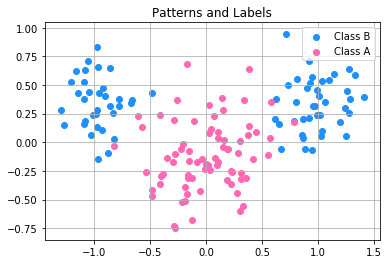

In [34]:
# Plot the patterns and labels
lab1b.plot_data(X_train,T_train)

In [35]:
# Initialize weights matrices
nn.initialize_weights()

In [36]:
# Load training data
nn.training_data(X_train,T_train)

In [37]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)

Class A. Hits = 75, Fails = 0, Accuracy = 100.0%
Class B. Hits = 0, Fails = 75, Accuracy = 0.0%
Hits = 75, Fails = 75, Accuracy = 50.0%


In [38]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = nn.train(X_train,T_train,X_valid,T_valid)

In [39]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)

Class A. Hits = 71, Fails = 4, Accuracy = 94.667%
Class B. Hits = 74, Fails = 1, Accuracy = 98.667%
Hits = 145, Fails = 5, Accuracy = 96.667%


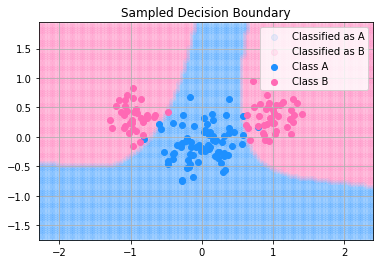

In [40]:
# Plot the sampled decision boundary
K = 100
L = 1
sampling_pattern, boundary_samples = nn.decision_boundary(X_train,K,L)
lab1b.plot_data_boundary(X_train,T_train,sampling_pattern,boundary_samples,L)

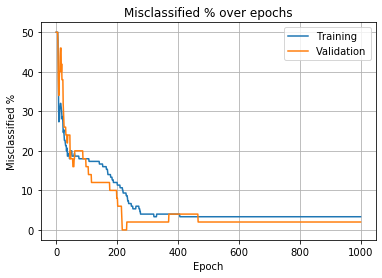

In [41]:
# Plot missclassification
lab1b.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')

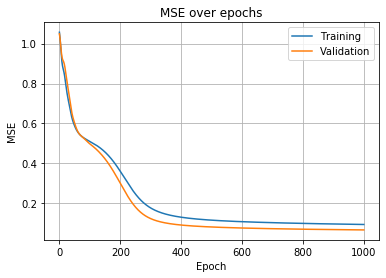

In [42]:
# Plot MSE
lab1b.plot_error(epoch_mses,epoch_mses_valid,'MSE')

### 20% from negative x subset of A and 80% positive x subset of A

In [43]:
# Subsample and mix the data
f_A, f_B, f_posneg = 1, 1, 0.2
T_train, X_train, T_valid, X_valid = lab1b.subsample_mix_classes_complex(X_A,X_B,f_A,f_B,f_posneg)

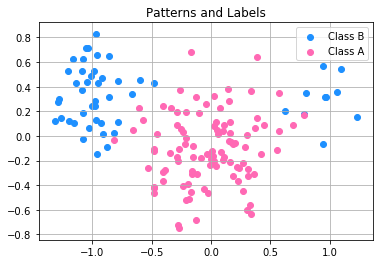

In [44]:
# Plot the patterns and labels
lab1b.plot_data(X_train,T_train)

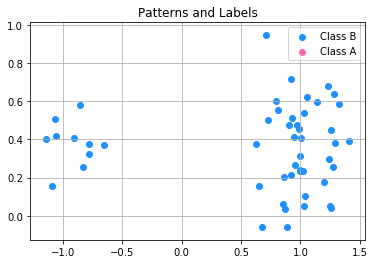

In [45]:
# Plot the patterns and labels
lab1b.plot_data(X_valid,T_valid)

In [46]:
# Initialize weights matrices
nn.initialize_weights()

In [47]:
# Load training data
nn.training_data(X_train,T_train)


In [48]:
T_guessed,accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)


Class A. Hits = 99, Fails = 1, Accuracy = 99.0%
Class B. Hits = 9, Fails = 41, Accuracy = 18.0%
Hits = 108, Fails = 42, Accuracy = 72.0%


In [49]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = nn.train(X_train,T_train,X_valid,T_valid)


In [50]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)

Class A. Hits = 99, Fails = 1, Accuracy = 99.0%
Class B. Hits = 40, Fails = 10, Accuracy = 80.0%
Hits = 139, Fails = 11, Accuracy = 92.667%


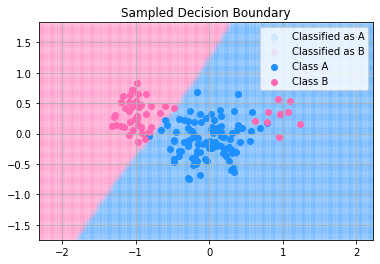

In [51]:
# Plot the sampled decision boundary
K = 100
L = 1
sampling_pattern, boundary_samples = nn.decision_boundary(X_train,K,L)
lab1b.plot_data_boundary(X_train,T_train,sampling_pattern,boundary_samples,L)


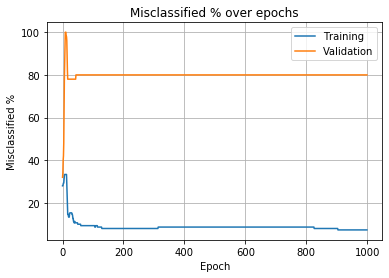

In [52]:
# Plot missclassification
lab1b.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')


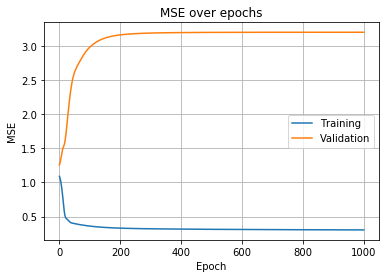

In [53]:
# Plot MSE
lab1b.plot_error(epoch_mses,epoch_mses_valid,'MSE')

## Encoder problem